In [1]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [0]:
import os
os.getcwd()
os.chdir("drive/Colab_Work/Mclain")

In [5]:
import numpy as np
import pandas as pd
from NeuralNetwork import NeuralNetwork

df_train = pd.read_csv('devnagri_train.csv', header=None)
df_test = pd.read_csv('devnagri_test_public.csv', header=None)

X = np.array(df_train.iloc[:, 1:]).T
X = X / 255
X_test = np.array(df_test.iloc[:, 1:]).T
X_test = X_test / 255
print(X.shape, X_test.shape)

Y = np.array(df_train.iloc[:, :1]).T
Y_test = np.array(df_test.iloc[:, :1]).T
# One-hot encode the target
num_classes = len(np.unique(Y))
print(num_classes)
Y = np.eye(num_classes)[Y.reshape(-1)].T
Y_test = np.eye(num_classes)[Y_test.reshape(-1)].T
print(Y.shape, Y_test.shape)

num_inputs = X.shape[0]
num_outputs = Y.shape[0]  # = num_classes
hidden_archi = [128, 64]

font_nn = NeuralNetwork(input_size = num_inputs,
                        output_size = num_outputs,
                        hidden_layer_sizes = hidden_archi,
                        activation = "relu")

font_nn.fit(X, Y, 0.01, 500, True, 32)

Y_pred = font_nn.predict(X)

(1024, 78200) (1024, 6900)
46
(46, 78200) (46, 6900)
Iteration: 0 Cost: 5.267337731478517
Iteration: 10 Cost: 4.48399292918797
Iteration: 20 Cost: 4.467870241707459
Iteration: 30 Cost: 4.490718680557457
Iteration: 40 Cost: 4.477540353434241
Iteration: 50 Cost: 4.48153470656579
Iteration: 60 Cost: 4.480117654114061
Iteration: 70 Cost: 4.490402710697337
Iteration: 80 Cost: 4.480025309564043
Iteration: 90 Cost: 4.492013571306273
Iteration: 100 Cost: 4.488901026468319
Iteration: 110 Cost: 4.503883120365828
Iteration: 120 Cost: 4.475502057444009
Iteration: 130 Cost: 4.4807009513640566
Iteration: 140 Cost: 4.482584430992461
Iteration: 150 Cost: 4.474785601768024
Iteration: 160 Cost: 4.48314485296304
Iteration: 170 Cost: 4.491389021047398
Iteration: 180 Cost: 4.466951726828516
Iteration: 190 Cost: 4.475218179886051
Iteration: 200 Cost: 4.481622615306707
Iteration: 210 Cost: 4.472416983812134
Iteration: 220 Cost: 4.484011069664665
Iteration: 230 Cost: 4.478216898254977
Iteration: 240 Cost: 4.4

In [6]:
font_nn.costs

[5.267337731478517,
 4.48399292918797,
 4.467870241707459,
 4.490718680557457,
 4.477540353434241,
 4.48153470656579,
 4.480117654114061,
 4.490402710697337,
 4.480025309564043,
 4.492013571306273,
 4.488901026468319,
 4.503883120365828,
 4.475502057444009,
 4.4807009513640566,
 4.482584430992461,
 4.474785601768024,
 4.48314485296304,
 4.491389021047398,
 4.466951726828516,
 4.475218179886051,
 4.481622615306707,
 4.472416983812134,
 4.484011069664665,
 4.478216898254977,
 4.491872638509461,
 4.481833877063746,
 4.483115596155344,
 4.483138538956885,
 4.479264818212033,
 4.479042271584366,
 4.475502057444009,
 4.480086458438926,
 4.4849421708204975,
 4.485943866610354,
 4.454454745002078,
 4.4892013025369035,
 4.471896912779246,
 4.474259955648323,
 4.488871108047748,
 4.475974541106307,
 4.47906673081048,
 4.478374173078139,
 4.469549025449136,
 4.482826620689021,
 4.491749204872773,
 4.49802241159481,
 4.482599167754104,
 4.495455099923397,
 4.4751842110737385,
 4.487634442042649]

In [0]:
import matplotlib.pyplot as plt

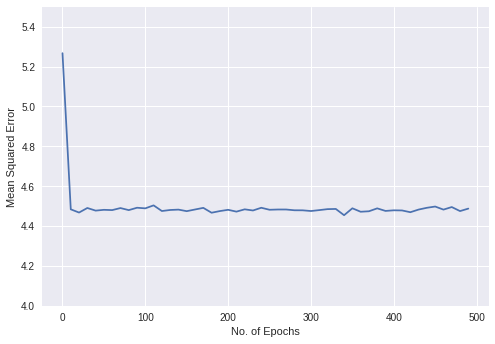

In [11]:
plt.plot(range(0, 500, 10), font_nn.costs)
plt.xlabel("No. of Epochs")
plt.ylabel("Mean Squared Error")
plt.ylim((4, 5.5))
plt.show()